In [5]:
import torch
import os
import json
import glob
from collections import defaultdict, OrderedDict
from os import path
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data_dir = "/home/shtoshni/Research/litbank_coref/data/litbank/independent/0"
log_dir = "/home/shtoshni/Research/litbank_coref/data/archive/logs"

if not path.exists(log_dir):
    os.makedirs(log_dir)
    
train_file = path.join(data_dir, "train.512.jsonlines")

In [11]:
train_instances = []
with open(train_file) as f:
    for line in f:
        line = line.strip()
        instance = json.loads(line)
        train_instances.append(instance)

In [17]:
mention_lens = []
doc_lens = []
chain_lens = []
for instance in train_instances:
    doc_lens.append(len(instance["subtoken_map"]))
    
    clusters = instance["clusters"]
    for mention_list in clusters:
        chain_lens.append(len(mention_list))
        for (start_idx, end_idx) in mention_list:
            mention_lens.append(end_idx - start_idx + 1)

(array([2.2671e+04, 3.9700e+02, 8.2000e+01, 2.9000e+01, 2.2000e+01,
        7.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <a list of 10 Patch objects>)

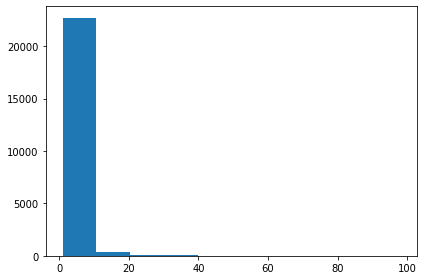

In [18]:
fig, ax = plt.subplots(tight_layout=True)

ax.hist(mention_lens)

In [19]:
with open(path.join(log_dir, "mentions.log"), "w") as f:
    f.write("# of docs: {}\n\n".format(len(train_instances)))
    f.write("# of mentions: {}\n".format(len(mention_lens)))
    f.write("Mean length: {:.3f}\n\n".format(np.mean(mention_lens)))
    for percentile in [50, 75, 90, 95, 99, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
        f.write("Percentile: {}, Length: {:.3f}\n".format(percentile, np.percentile(mention_lens, percentile)))

In [20]:
with open(path.join(log_dir, "coref_chains.log"), "w") as f:
    f.write("# of docs: {}\n\n".format(len(train_instances)))
    f.write("# of coref chains: {}\n".format(len(chain_lens)))
    f.write("Mean length: {:.3f}\n\n".format(np.mean(chain_lens)))
    for percentile in [50, 75, 90, 95, 99, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
        f.write("Percentile: {}, Length: {:.3f}\n".format(percentile, np.percentile(chain_lens, percentile)))

In [21]:
with open(path.join(log_dir, "docs.log"), "w") as f:
    f.write("# of docs: {}\n\n".format(len(train_instances)))
    f.write("Mean length: {:.3f}\n\n".format(np.mean(doc_lens)))
    for percentile in [50, 75, 90, 95, 99, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
        f.write("Percentile: {}, Length: {:.3f}\n".format(percentile, np.percentile(doc_lens, percentile)))